**A)Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:**

In [10]:
# import library and packages
import numpy as np
import pandas as pd

Heart_disease_df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
Heart_disease_df.head()
index = Heart_disease_df.index
number_of_rows = len(index) 
print(number_of_rows)


281


**B)Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.**

In [6]:
# Creating the Feature Matrix for heart disease dataset:

# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

# use the above list to select the features from the original DataFrame
X = Heart_disease_df[feature_cols]  

# select a Series of labels (the last column) from the DataFrame
y = Heart_disease_df['AHD']


#Normalizing the data
from sklearn import preprocessing 
scale_normalised = preprocessing.scale(X)
print(scale_normalised)

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ...
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]


**C)Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_normalised, y, test_size=0.25, random_state=3)
#y_train, y_test = train_test_split( y, test_size=0.25, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(210, 6)
(210,)
(71, 6)
(71,)


**D)Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)
score_lr = accuracy_score(y_test, y_predict_lr)
print('Accuracy of Logistic Regression:',score_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
Accuracy of Logistic Regression: 0.7183098591549296


Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [5]:

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])



[[0.49847189 0.50152811]
 [0.55153223 0.44846777]
 [0.39514152 0.60485848]
 [0.39636475 0.60363525]
 [0.8463285  0.1536715 ]
 [0.77042084 0.22957916]
 [0.73485372 0.26514628]
 [0.86548609 0.13451391]
 [0.35529864 0.64470136]
 [0.6707959  0.3292041 ]
 [0.09558374 0.90441626]
 [0.91924811 0.08075189]
 [0.29096442 0.70903558]
 [0.43043601 0.56956399]
 [0.66808153 0.33191847]
 [0.85924791 0.14075209]
 [0.11598482 0.88401518]
 [0.68324451 0.31675549]
 [0.11239963 0.88760037]
 [0.33485811 0.66514189]
 [0.85412798 0.14587202]
 [0.86376748 0.13623252]
 [0.22496489 0.77503511]
 [0.92910529 0.07089471]
 [0.10918691 0.89081309]
 [0.57443365 0.42556635]
 [0.72926897 0.27073103]
 [0.43211917 0.56788083]
 [0.67752917 0.32247083]
 [0.77600088 0.22399912]
 [0.30112704 0.69887296]
 [0.10864797 0.89135203]
 [0.17558051 0.82441949]
 [0.89158205 0.10841795]
 [0.81006702 0.18993298]
 [0.01129614 0.98870386]
 [0.06726456 0.93273544]
 [0.73258706 0.26741294]
 [0.20480859 0.79519141]
 [0.51449134 0.48550866]


In [6]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

print(fpr)
print(tpr)



[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [7]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


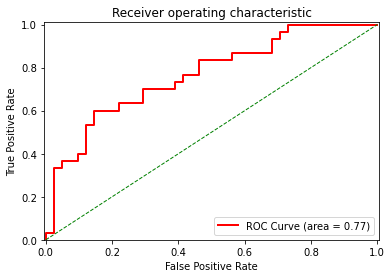

In [8]:
# Importing the "pyplot" package of "matplotlib" library of python to generate graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than opening a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()